# **Attempt to Create ML Regression Model Using openweathermap.org Data**
Output "openweather_merged_data.csv" 
- openweathermap data file
- Panel Output files

I failed to create a usable model using this method.

In [1]:
# dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# import the merged openweathermap data / solar panel output data
weather_data = pd.read_csv('../csv_files/openweather_merged_data.csv')

weather_data

,Time,month,day,hour,Energy (Wh),temp,feels_like,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description
0,2019-03-22 07:00:00,3,22,7,124,37.22,37.22,1019,71,1.01,350,0.00,0.0,0.0,0.0,1,800,Clear,sky is clear
1,2019-03-22 08:00:00,3,22,8,1437,35.92,35.92,1020,72,1.01,344,0.00,0.0,0.0,0.0,1,800,Clear,sky is clear
2,2019-03-22 09:00:00,3,22,9,2602,34.81,31.32,1020,74,4.00,55,0.00,0.0,0.0,0.0,1,800,Clear,sky is clear
3,2019-03-22 10:00:00,3,22,10,4759,33.33,30.83,1020,77,3.00,31,0.00,0.0,0.0,0.0,1,800,Clear,sky is clear
4,2019-03-22 11:00:00,3,22,11,6529,31.68,31.68,1021,79,1.01,5,0.00,0.0,0.0,0.0,1,800,Clear,sky is clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13141,2021-08-25 20:00:00,8,25,20,0,83.35,84.52,1019,51,5.99,15,0.00,0.0,0.0,0.0,20,801,Clouds,few clouds
13142,2021-08-26 06:00:00,8,26,6,9,65.80,65.43,1021,71,3.44,10,0.00,0.0,0.0,0.0,20,801,Clouds,few clouds
13143,2021-08-26 07:00:00,8,26,7,465,65.37,64.90,1021,70,1.01,67,0.25,0.0,0.0,0.0,20,500,Rain,light rain
13144,2021-08-26 08:00:00,8,26,8,1188,64.44,63.91,1021,71,4.61,20,0.00,0.0,0.0,0.0,40,802,Clouds,scattered clouds


In [3]:
# create dummy fields for weather description column - the data is categorical
weather_data = pd.get_dummies(weather_data, columns=["weather_description"])
weather_data.columns


Index(['Time', 'month', 'day', 'hour', 'Energy (Wh)', 'temp', 'feels_like',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h',
       'snow_1h', 'snow_3h', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description_broken clouds', 'weather_description_few clouds',
       'weather_description_fog', 'weather_description_haze',
       'weather_description_heavy intensity rain',
       'weather_description_heavy snow',
       'weather_description_light intensity drizzle',
       'weather_description_light intensity shower rain',
       'weather_description_light rain',
       'weather_description_light rain and snow',
       'weather_description_light snow', 'weather_description_mist',
       'weather_description_moderate rain',
       'weather_description_overcast clouds',
       'weather_description_proximity thunderstorm',
       'weather_description_scattered clouds',
       'weather_description_shower rain', 'weather_description_sky is clear',


In [4]:
# create list of all of the columns wanted for regression model
cols = [
    'month', 
    'hour', 
    'Energy (Wh)', 
    'weather_description_broken clouds', 
    'weather_description_few clouds',
    'weather_description_fog', 
    'weather_description_haze',
    'weather_description_heavy intensity rain',
    'weather_description_heavy snow',
    'weather_description_light intensity drizzle',
    'weather_description_light intensity shower rain',
    'weather_description_light rain',
    'weather_description_light rain and snow',
    'weather_description_light snow', 
    'weather_description_mist',
    'weather_description_moderate rain',
    'weather_description_overcast clouds',
    'weather_description_proximity thunderstorm',
    'weather_description_scattered clouds',
    'weather_description_shower rain', 
    'weather_description_sky is clear',
    'weather_description_smoke', 
    'weather_description_snow',
    'weather_description_thunderstorm',
    'weather_description_thunderstorm with heavy rain',
    'weather_description_thunderstorm with light rain',
    'weather_description_thunderstorm with rain',
    'weather_description_very heavy rain'
]

In [5]:
# filter df based - list provided
weather_data = weather_data[cols]
weather_data

,month,hour,Energy (Wh),weather_description_broken clouds,weather_description_few clouds,weather_description_fog,weather_description_haze,weather_description_heavy intensity rain,weather_description_heavy snow,weather_description_light intensity drizzle,...,weather_description_scattered clouds,weather_description_shower rain,weather_description_sky is clear,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,3,7,124,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3,8,1437,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,9,2602,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,10,4759,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3,11,6529,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13141,8,20,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13142,8,6,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13143,8,7,465,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13144,8,8,1188,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
# predictors, response
X = weather_data[cols].drop(columns=['Energy (Wh)'])
y = weather_data["Energy (Wh)"].values.reshape(-1, 1)
print(X.shape, y.shape)

(13146, 27) (13146, 1)


In [7]:
# import scikit learn model create training and testing data sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# scale data
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
# scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [10]:
# create regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

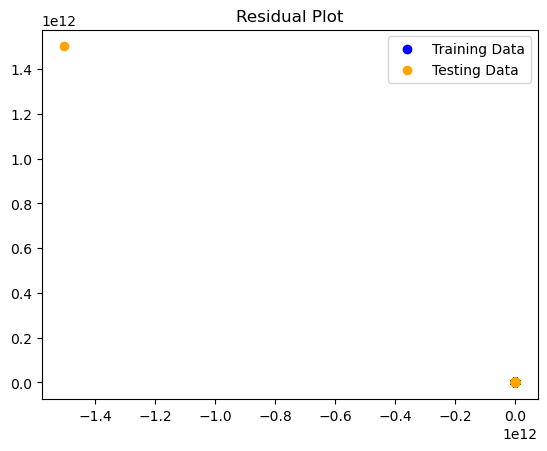

In [11]:
# apply the model to data and attempt to plot results - should have used box plots - if I have time, I'll come back and change this.
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 6.860570652796196e+20, R2: -6.883544382574242e+20


In [13]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9073582602184249, R2: 0.08960330398124694


In [14]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9055371933524948, R2: 0.09143046898393614


In [15]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9057345921947789, R2: 0.09123240911972097
